<a href="https://colab.research.google.com/github/michel-phylo/Adera2.0/blob/main/Copy_of_Adera_CNV_data_20_TYPES_july_Tomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!pip3 install tensorflow

from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [ ]:
import pandas as pd

first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g_onely_main.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_geneb_onely_main.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_genec_only_main_14.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('Adera_Complete_data_base_10_july_v1_2_38pm.txt',delimiter=',',engine='python')
#first_data_adera=pd.read_table('test1_ADMKR3.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('test2_ADMKR3_LIVERc.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('test1_ADMKR3_COMBINED.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('test1_ADMKR3_COMBINEDc.txt',delimiter='\t',engine='python')
#first_data_adera = first_data_adera.dropna(subset=first_data_adera.columns, how='all')
#first_data_adera = first_data_adera.dropna(subset=first_data_adera.columns, how='all')

#first_data_adera.columns = ['index','Gene','CNA','Freq','chromosome','start','strand','Cancer_type']
first_data_adera


,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
#first_data_adera2 = first_data_adera1.sort_values(by=['Freq'], ascending=[ False])
#first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Is Cancer Gene (source: OncoKB)', 'Freq'], ascending=[True, True, False])
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])

In [ ]:
first_data_adera3

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')

In [ ]:
first_data_adera4

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer
12978,ZSWIM7,AMP,9.1,17,15976560.0,15999717.0,3,Sarcoma
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(first_data_adera4["CNA"])
Adera_CNA= encoder.transform(first_data_adera4["CNA"])

Adera_CNA1= np_utils.to_categorical(Adera_CNA,num_classes=4)

In [ ]:
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
print(Adera_CNA1.shape) #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(first_data_adera4 ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states

(7058, 4)


(7058, 4)

In [ ]:

Adera_chromosome=first_data_adera4['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)
#print(Adera_chromosome2.shape)

Adera_start=first_data_adera4['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=first_data_adera4['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=first_data_adera4['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

Adera_freq=first_data_adera4['Freq']
Adera_freq1=np.array(Adera_freq)
Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)

In [ ]:
#normalise chromsome numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape


(7058, 1)

In [ ]:
#cancer_type_column = 'Cancer_type'

# Get unique cancer types in the dataset
#unique_cancer_types = first_data_adera4[cancer_type_column].unique()

# Count the rows for each cancer type
#for cancer_type in unique_cancer_types:
  #  cancer_type_data =first_data_adera4[first_data_adera4[cancer_type_column] == cancer_type]
   # num_rows = len(cancer_type_data)
   # print("Number of rows in", cancer_type, ":", num_rows)

In [ ]:
#k1=first_data_adera4["Is Cancer Gene (source: OncoKB)"].unique()
k1=first_data_adera4["Cancer_type"].unique()

k1.shape[0]

20

In [ ]:
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
print(Adera_CNA1.shape)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape

(7058, 4)


(7058, 8)

In [ ]:
#Output_net_Adera=first_data_adera4[["Is Cancer Gene (source: OncoKB)"]]
Output_net_Adera=first_data_adera4[["Cancer_type"]]

Output_net_Adera
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
#encoder.fit(first_data_adera4[["Is Cancer Gene (source: OncoKB)"]])
encoder.fit(first_data_adera4[["Cancer_type"]])

#Output_net_Adera1 = encoder.transform(first_data_adera4[["Is Cancer Gene (source: OncoKB)"]])
Output_net_Adera1 = encoder.transform(first_data_adera4[["Cancer_type"]])

Output_net_Adera1.shape

Output_net_Adera2= np_utils.to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])
Output_net_Adera2.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


(7058, 20)

In [ ]:
Output_net_Adera2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,8) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types

In [ ]:
print(k1.shape[0])

20


In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)
#es_ADERA2= ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
#                              patience=0, min_lr=0.5)
grace_model = tf.keras.Sequential([
  #tf.keras.layers.Dense(7, activation='softmax'), #softmax gives probailities that we encode at the end, do change
#tf.keras.layers.Dense(8, activation='elu'),
     #tf.keras.layers.Dense(2, activation='exponential'),
#tf.keras.layers.Conv2D(filters=2, kernel_size=8, strides=1, padding="same"),
#tf.keras.layers.Dense(7, activation='relu'),
 # tf.keras.layers.Dense(256, activation='tanh'),

  #tf.keras.layers.Dense(7, activation='softmax'), #softmax gives probailities that we encode at the end, do change
#tf.keras.layers.Dense(8, activation='elu'),
     #tf.keras.layers.Dense(2, activation='exponential'),
#tf.keras.layers.Conv2D(filters=2, kernel_size=8, strides=1, padding="same"),
#tf.keras.layers.Dense(7, activation='relu'),
  # tf.keras.layers.Dense(7, activation='exponential'),
#tf.keras.layers.Dense(7, activation='relu'),

#Model 1
 #  tf.keras.layers.Dense(256, activation='relu'),
 # tf.keras.layers.BatchNormalization(),
 # tf.keras.layers.Dropout(0.002),
 #  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(128, activation='elu'),
 #    tf.keras.layers.Dropout(0.05),
 #tf.keras.layers.Dense(64, activation='selu'),
#  #
 #  tf.keras.layers.Dense(64, activation='elu'),
 #  tf.keras.layers.Dense(32, activation='elu'),
   # tf.keras.layers.Dense(32, activation='relu'),
#tf.keras.layers.Dense(2, activation='exponential'),

 #tf.keras.layers.Dense(20, activation='softmax'),

#Model 2
  tf.keras.layers.Dense(256, activation='relu'),


   tf.keras.layers.Dense(256, activation='relu'),
 # tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
     tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(22, activation='sigmoid'),
  tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(20, activation='softmax'),

  ######Model 3
  #   tf.keras.layers.Dense(128, activation='relu'),
  #   tf.keras.layers.Dropout(0.002),
  # tf.keras.layers.Dense(64, activation='relu'),

 #  tf.keras.layers.Dense(32, activation='relu'),
 #   tf.keras.layers.Dense(15, activation='selu'),
#tf.keras.layers.Dense(15, activation='exponential'),
# tf.keras.layers.Dense(15, activation='softmax'),
      ])




#optimizer_Adera=tf.keras.optimizers.Adam(learning_rate=0.5*1e-4, clipnorm = .01)
optimizer_Adera=tf.keras.optimizers.Adamax(learning_rate=2*1e-2, clipnorm = .08)
#optimizer_Adera=tf.keras.optimizers.AdamW(learning_rate=1e-5,weight_decay=0.09,jit_compile=True,use_ema=False,ema_momentum=0.91,ema_overwrite_frequency=50000)
#optimizer_Adera=tf.keras.optimizers.AdamW(learning_rate=1e-5,weight_decay=0.09,jit_compile=False,use_ema=True,ema_momentum=0.01,ema_overwrite_frequency=50)
#optimizer_Adera=tf.keras.optimizers.AdamW(learning_rate=1e-5,weight_decay=0.05,jit_compile=False,use_ema=True,ema_momentum=0.01,ema_overwrite_frequency=5)
#optimizer_Adera=tf.keras.optimizers.SGD(learning_rate=1e-15,momentum=0.09,nesterov=True,use_ema=True)
#grace_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-15), loss='categorical_crossentropy', metrics=['accuracy','mse', 'mae'])
#grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy','mse', 'mae'])
grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy'])
##grace_model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy','mse', 'mae', 'mape'])
k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=150,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=350,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8

Epoch 1/150
15/15 [==============================] - 13s 46ms/step - loss: 2.3644 - accuracy: 0.2362 - val_loss: 1.9529 - val_accuracy: 0.3380
Epoch 2/150
15/15 [==============================] - 0s 14ms/step - loss: 1.9256 - accuracy: 0.3270 - val_loss: 1.6875 - val_accuracy: 0.4230
Epoch 3/150
15/15 [==============================] - 0s 19ms/step - loss: 1.7171 - accuracy: 0.3851 - val_loss: 1.5215 - val_accuracy: 0.4357
Epoch 4/150
15/15 [==============================] - 0s 15ms/step - loss: 1.5317 - accuracy: 0.4535 - val_loss: 1.3297 - val_accuracy: 0.5421
Epoch 5/150
15/15 [==============================] - 0s 14ms/step - loss: 1.3794 - accuracy: 0.5324 - val_loss: 1.1969 - val_accuracy: 0.6485
Epoch 6/150
15/15 [==============================] - 0s 14ms/step - loss: 1.2600 - accuracy: 0.5813 - val_loss: 1.1263 - val_accuracy: 0.6256
Epoch 7/150
15/15 [==============================] - 0s 19ms/step - loss: 1.1928 - accuracy: 0.5932 - val_loss: 1.0334 - val_accuracy: 0.6256
Epoch

In [ ]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)

18/18 [==============================] - 0s 9ms/step - loss: 0.4815 - accuracy: 0.8524


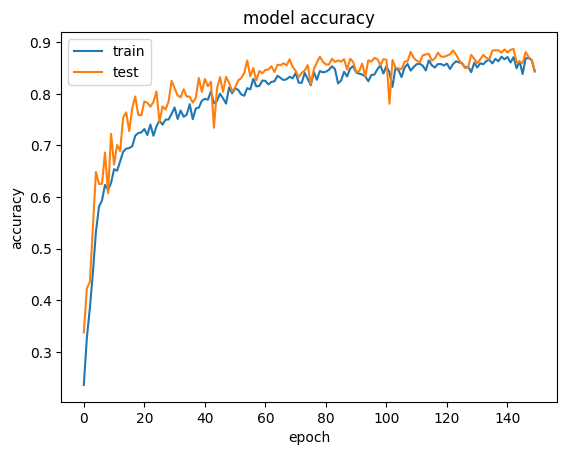

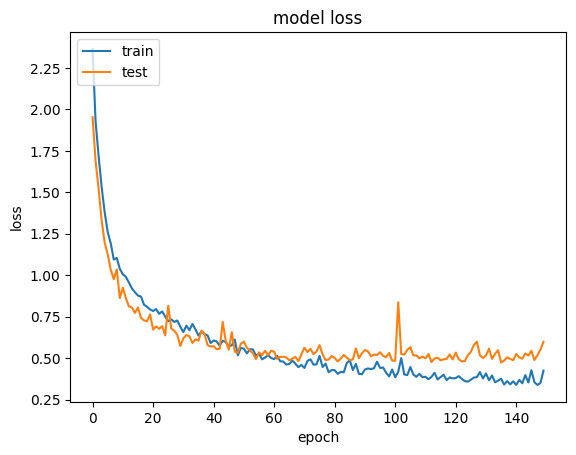

In [ ]:
# summarize history for accuracy
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
axes = plt.gca()
#axes.set_ylim([-0.005,0.005])
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
#########################
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.title('model mape')
#plt.plot(k_adera.history['mean_squared_error'])
#plt.plot(k_adera.history['val_mape'])
#plt.plot(k_adera.history['mape'])
#plt.ylabel('mape')
#plt.xlabel('epoch')
#plt.show()
#plt.title('model mae')
#plt.plot(k_adera.history['val_mae'])
#plt.plot(k_adera.history['mae'])
#plt.show()

In [ ]:
grace_model.save("adera+87+90+20+conv2d")



In [ ]:
#first_data_adera4["Is Cancer Gene (source: OncoKB)"].unique()
#first_data_adera4["Cancer_type"].unique()
#adera_47_40_model = tf.keras.saving.load_model("adera+87+90+20+conv2d")

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
#learning_rate=2*1e-2, clipnorm = .08
# Define the grid of hyperparameters to search

batch_sizes = [400]#+#,100 , 150, 200,250,300,350,400,450,500,600,700,800]
learning_rates = [0.002]#0.00002, 2*1e-4, 2*1e-3, 2*1e-2]

clip_norms = [0.08]#,  0.08,0.12,0.16,0.2]
validation_splits = [0.4]#, 0.4, 0.7, 0.9]

best_validation_loss = float('inf')
best_validation_accuracy = 0.0
best_batch_size = None
best_learning_rate = None
best_clip_norm = None
best_validation_split = None

# Lists to store results
batch_sizes_results = []
learning_rates_results = []
clip_norms_results = []
validation_splits_results = []
validation_accuracy_results = []
validation_loss_results = []

# Perform the grid search
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for clip_norm in clip_norms:
            for validation_split in validation_splits:
                grace_model = tf.keras.Sequential([
             tf.keras.layers.Dense(256, activation='relu'),


   tf.keras.layers.Dense(256, activation='relu'),
 # tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
tf.keras.layers.Conv2D(filters=22, kernel_size=8, strides=1, padding="same"),
     tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(22, activation='sigmoid'),
  tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(20, activation='softmax'),
                ])

                optimizer_Adera = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm)
                grace_model.compile(optimizer=optimizer_Adera, loss='categorical_crossentropy', metrics=['accuracy'])

                #es_ADERA = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
                es_ADERA = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=300)

                k_adera = grace_model.fit(
                    Input_Adera_numpy2, Output_net_Adera3,
                    verbose=0, validation_split=validation_split, epochs=100, batch_size=batch_size,
                    callbacks=[es_ADERA]
                )

                # Check if the current hyperparameters yield better validation loss or accuracy
                current_validation_loss = k_adera.history['val_loss'][-1]
                current_validation_accuracy = k_adera.history['val_accuracy'][-1]

                if current_validation_loss < best_validation_loss and current_validation_accuracy > best_validation_accuracy:
                    best_validation_loss = current_validation_loss
                    best_validation_accuracy = current_validation_accuracy
                    best_batch_size = batch_size
                    best_learning_rate = learning_rate
                    best_clip_norm = clip_norm
                    best_validation_split = validation_split

                # Store results
                batch_sizes_results.append(batch_size)
                learning_rates_results.append(learning_rate)
                clip_norms_results.append(clip_norm)
                validation_splits_results.append(validation_split)
                validation_accuracy_results.append(current_validation_accuracy)
                validation_loss_results.append(current_validation_loss)

# Print the best hyperparameters found
print("Best Batch Size:", best_batch_size)
print("Best Learning Rate:", best_learning_rate)
print("Best Clip Norm:", best_clip_norm)
print("Best Validation Split:", best_validation_split)
print("Best Validation Accuracy:", best_validation_accuracy)
print("Best Validation Loss:", best_validation_loss)



Best Batch Size: 400
Best Learning Rate: 0.002
Best Clip Norm: 0.08
Best Validation Split: 0.4
Best Validation Accuracy: 0.8410056829452515
Best Validation Loss: 0.5233750343322754


In [ ]:
batch_sizes_normalized = np.array(batch_sizes_results) / max(batch_sizes)
learning_rates_normalized = np.array(learning_rates_results) / max(learning_rates)
clip_norms_normalized = np.array(clip_norms_results) / max(clip_norms)
validation_splits_normalized = np.array(validation_splits_results) / max(validation_splits)

# Plotting the results
#plt.figure(figsize=(12, 6))
#plt.errorbar(batch_sizes_normalized, validation_accuracy_results, fmt='o', color='b', label='Validation Accuracy')
#plt.xticks([0.25, 0.5, 0.75, 1.0], ['Batch Size', 'Learning Rate', 'Clip Norm', 'Validation Split'])
#plt.xlabel('Hyperparameters')
#plt.ylabel('Validation Accuracy')
#plt.title('Hyperparameters vs. Validation Accuracy')
#plt.legend()
#plt.grid(True)
#plt.show()

plt.figure()
plt.plot(validation_accuracy_results,batch_sizes_normalized,'o')
plt.show()

In [ ]:
plt.figure()
plt.plot( batch_sizes_normalized, validation_accuracy_results,'o', label='Batch Size')
plt.plot( learning_rates_normalized, validation_accuracy_results,'o', label='Learning Rate')
plt.plot( clip_norms_normalized,validation_accuracy_results, 'o', label='Clip Norm')
plt.plot( validation_splits_normalized,validation_accuracy_results, 'o', label='Validation Split')
plt.ylabel('Validation Accuracy')
plt.xlabel('Hyperparameters')
plt.title('Validation Accuracy vs. Hyperparameters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1)
plt.grid(True)
plt.show()
